## Проянников Илья ИДБ-19-11 Лабораторная работа №2

### Импорт библиотек

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.style.use("seaborn")

## Часть 1

### Задание 3

#### Пункт 1

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
train_validation, test = train_test_split(df, test_size = 0.1)
train_validation.shape, test.shape

((18576, 10), (2064, 10))

In [4]:
train, validation = train_test_split(train_validation, test_size = 0.1)
train.shape, validation.shape

((16718, 10), (1858, 10))

#### Пункт 2

In [5]:
train = pd.get_dummies(train, columns=["ocean_proximity"])
validation = pd.get_dummies(validation, columns=["ocean_proximity"])
test = pd.get_dummies(test, columns=["ocean_proximity"])

#### Пункт 3

In [6]:
train["average_rooms"] = train["total_rooms"] / train["households"]
train["average_bedrooms"] = train["total_bedrooms"] / train["households"]

validation["average_rooms"] = validation["total_rooms"] / validation["households"]
validation["average_bedrooms"] = validation["total_bedrooms"] / validation["households"]

test["average_rooms"] = test["total_rooms"] / test["households"]
test["average_bedrooms"] = test["total_bedrooms"] / test["households"]

#### Пункт 4

In [7]:
train.isna().sum(), validation.isna().sum(), test.isna().sum()

(longitude                       0
 latitude                        0
 housing_median_age              0
 total_rooms                     0
 total_bedrooms                174
 population                      0
 households                      0
 median_income                   0
 median_house_value              0
 ocean_proximity_<1H OCEAN       0
 ocean_proximity_INLAND          0
 ocean_proximity_ISLAND          0
 ocean_proximity_NEAR BAY        0
 ocean_proximity_NEAR OCEAN      0
 average_rooms                   0
 average_bedrooms              174
 dtype: int64,
 longitude                      0
 latitude                       0
 housing_median_age             0
 total_rooms                    0
 total_bedrooms                13
 population                     0
 households                     0
 median_income                  0
 median_house_value             0
 ocean_proximity_<1H OCEAN      0
 ocean_proximity_INLAND         0
 ocean_proximity_ISLAND         0
 ocean_proximity_

In [8]:
mean_value = train["average_bedrooms"].mean()

In [9]:
train.fillna(value = mean_value, inplace=True)
test.fillna(value = mean_value, inplace = True)
validation.fillna(value = mean_value, inplace=True)

#### Пункт 5

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
train.loc[:, 'longitude':'latitude'] = scaler.fit_transform(train.loc[:, 'longitude':'latitude'].to_numpy());
validation.loc[:, 'longitude':'latitude'] = scaler.transform(validation.loc[:, 'longitude':'latitude'].to_numpy());
test.loc[:, 'longitude':'latitude'] = scaler.transform(test.loc[:, 'longitude':'latitude'].to_numpy());

## Часть 2

### Задание 1

#### Пункт 1

In [13]:
davis_df = pd.read_csv("Davis.csv")
davis_df.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [14]:
davis_df.drop("Unnamed: 0", axis=1, inplace=True)
davis_df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [15]:
davis_df.isna().sum() / len(df) * 100

sex       0.000000
weight    0.000000
height    0.000000
repwt     0.082364
repht     0.082364
dtype: float64

In [16]:
davis_df.drop(["repwt", "repht"], axis=1)

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157
...,...,...,...
195,M,74,175
196,M,83,180
197,M,81,175
198,M,90,181


In [17]:
davis_df = davis_df[np.logical_and(davis_df['height'] > 100, davis_df['weight'] < 150)]

#### Пункт 2

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train, test = train_test_split(davis_df, test_size=50)
train.shape, test.shape

((149, 5), (50, 5))

#### Пункт 3

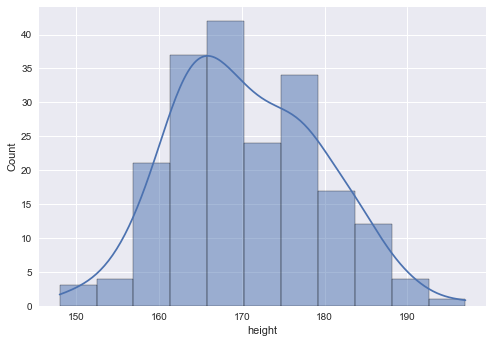

In [20]:
sns.histplot(davis_df["height"], kde = True);

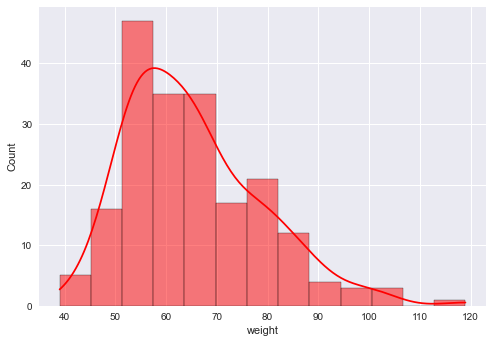

In [21]:
sns.histplot(davis_df["weight"], kde = True, color = "red");

In [22]:
davis_df_men = davis_df[davis_df["sex"] == 'M']
davis_df_women = davis_df[davis_df["sex"] == 'F']

davis_df_men.head(), davis_df_women.head()

(  sex  weight  height  repwt  repht
 0   M      77     182   77.0  180.0
 3   M      68     177   70.0  175.0
 5   M      76     170   76.0  165.0
 6   M      76     167   77.0  165.0
 7   M      69     186   73.0  180.0,
    sex  weight  height  repwt  repht
 1    F      58     161   51.0  159.0
 2    F      53     161   54.0  158.0
 4    F      59     157   59.0  155.0
 12   F      51     161   52.0  158.0
 13   F      64     168   64.0  165.0)

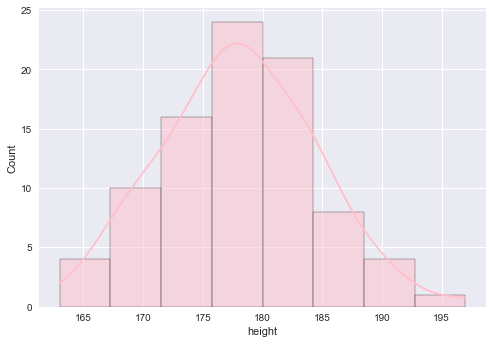

In [23]:
sns.histplot(davis_df_men['height'], kde = True, color = "pink");

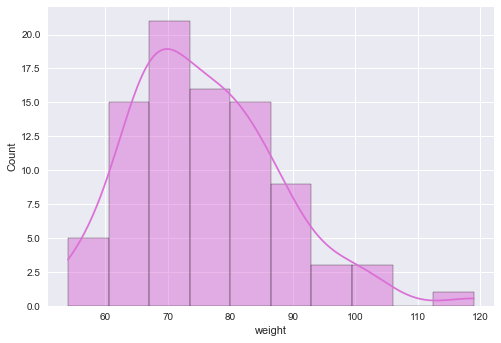

In [24]:
sns.histplot(davis_df_men["weight"], kde = True, color = "orchid");

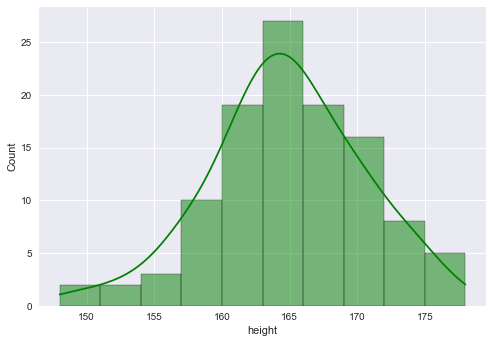

In [25]:
sns.histplot(davis_df_women["height"], kde = True, color = "green");

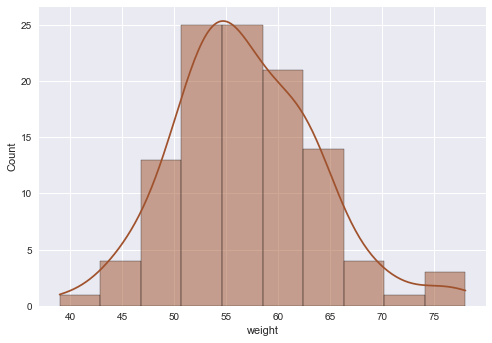

In [26]:
sns.histplot(davis_df_women["weight"], kde = True, color = "sienna");

#### Пункт 4

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
train.replace({'M': 0, 'F': 1}, inplace=True)
test.replace({'M': 0, 'F': 1}, inplace=True)

train.head(), test.head()

(     sex  weight  height  repwt  repht
 179    0      68     174   68.0  173.0
 174    0      62     168   64.0  168.0
 151    1      47     162   47.0  160.0
 80     1      61     165   60.0  163.0
 195    0      74     175   71.0  175.0,
      sex  weight  height  repwt  repht
 177    0      66     170   67.0  165.0
 144    1      64     171   66.0  171.0
 54     0      64     177    NaN    NaN
 74     1      50     166   50.0  161.0
 51     1      56     165   57.0  163.0)

In [29]:
y_train = train["sex"].to_numpy()
X_train = train.loc[:, ["height", "weight"]].to_numpy()

##### Обучающая выборка

In [30]:
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_train, y_train)

0.8993288590604027

##### Тестовая выборка

In [31]:
y_test = test["sex"].to_numpy()
X_test = test.loc[:, ["height", "weight"]].to_numpy()
clf.score(X_test, y_test)

0.94

#### Пункт 5

In [32]:
predicts = clf.predict(X_train)

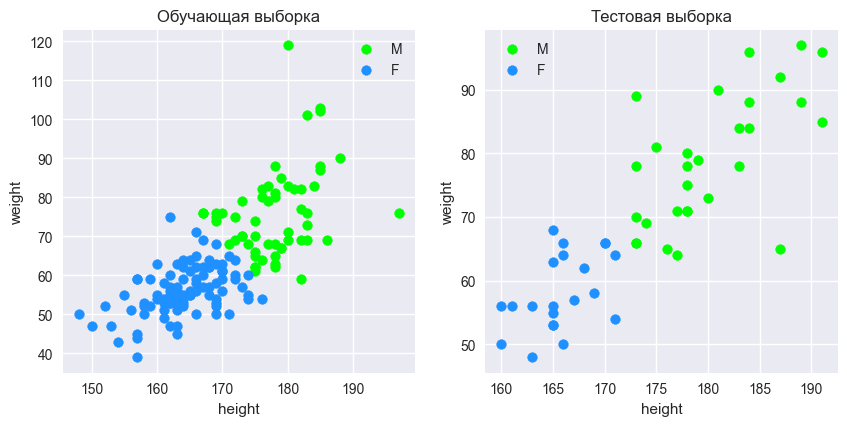

In [33]:
figure = plt.figure(figsize=(10, 10), dpi=100)
ax = figure.add_subplot(2, 2, 1)

x1_min, x1_max = X_train[:, 0].min() - 0.5, X_train[:, 1].max()+0.5
x2_min, x2_max = X_train[:, 0].min() - 0.5, X_train[:, 1].max()+0.5

xx1, xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx1.reshape(-1), xx2.reshape(-1)])
y_pred = clf.predict(X_pred)

ax.scatter(X_train[predicts == 0][:, 0], X_train[predicts == 0][:, 1], color='lime', label='M')
ax.scatter(X_train[predicts == 1][:, 0], X_train[predicts == 1][:, 1], color='dodgerblue', label='F')
ax.set_ylabel('weight')
ax.set_xlabel('height')
ax.set_title('Обучающая выборка')
ax.legend()


x1_min, x1_max = X_test[:, 0].min() - 0.5, X_test[:, 1].max()+0.5
x2_min, x2_max = X_test[:, 0].min() - 0.5, X_test[:, 1].max()+0.5

xx1, xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx1.reshape(-1), xx2.reshape(-1)])
y_pred = clf.predict(X_pred)


ax = figure.add_subplot(2, 2, 2)

predicts = clf.predict(X_test)
ax.scatter(X_test[predicts == 0][:, 0], X_test[predicts == 0][:, 1], color='lime', label='M')
ax.scatter(X_test[predicts == 1][:, 0], X_test[predicts == 1][:, 1], color='dodgerblue', label='F')
ax.set_ylabel('weight')
ax.set_xlabel('height')
ax.set_title('Тестовая выборка')
ax.legend()
plt.show()

### Задание 2

In [38]:
folds_df = pd.read_excel('Folds5x2_pp.xlsx')

In [39]:
folds_df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [40]:
folds_train_val, folds_test = train_test_split(folds_df, test_size=0.1)
folds_train, folds_val = train_test_split(folds_train_val, test_size=0.1)

In [41]:
folds_train_val.shape

(8611, 5)

In [42]:
folds_test.shape

(957, 5)

In [43]:
folds_train.shape

(7749, 5)

In [44]:
folds_val.shape

(862, 5)

In [48]:
lin_reg = LinearRegression()
X_train = folds_train.drop('PE',axis=1)
y_train = folds_train['PE']
X_val = folds_val.drop('PE',axis=1)
y_val = folds_val['PE']

In [49]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [50]:
predictions_array = lin_reg.predict(X_val)

In [54]:
r2_score(y_val, predictions_array)

0.9215134781401074

In [55]:
mean_squared_error(y_val, predictions_array)

23.013525286753406

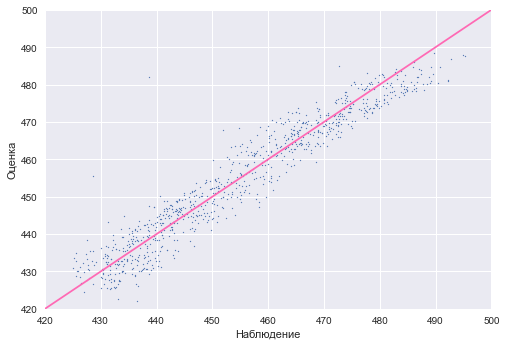

In [56]:
plt.gca().set(xlim = (420, 500),ylim = (420, 500), xlabel='Наблюдение', ylabel='Оценка')
plt.scatter(y_val, predictions_array, s = 1)
plt.plot(np.linspace(420,500),np.linspace(420,500), c = 'hotpink')